KeyboardInterrupt: 

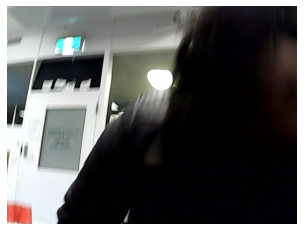

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Set the directory where you want to save the captured images
save_dir = 'images/images_calib6'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Open a connection to the camera (0 is usually the default camera)
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Image counter
img_counter = 0

print("Press 'c' to capture an image and 'q' to quit.")

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If the frame is not captured properly, exit the loop
    if not ret:
        print("Failed to grab frame")
        break

    # Convert the image from BGR to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the resulting frame using matplotlib
    plt.imshow(frame_rgb)
    plt.axis('off')  # Turn off axis
    display(plt.gcf())  # Display the figure in the Jupyter Notebook
    clear_output(wait=True)  # Clear the previous frame

    # Wait for a key press
    key = cv2.waitKey(1) & 0xFF

    # Press 'c' to capture the image
    if key == ord('c'):
        img_name = f"{save_dir}/image_{img_counter}.jpg"
        cv2.imwrite(img_name, frame)
        print(f"Image {img_counter} saved as {img_name}")
        img_counter += 1

    # Press 'q' to quit the capturing loop
    elif key == ord('q'):
        print("Exiting...")
        break

# Release the camera and close the windows
cap.release()
cv2.destroyAllWindows()
